---
**PROCESO**	
- [x] Cargar archivo, ver el contenido, preprocesarlo
- [ ] Procesar y manipular los datos
- [ ] Aplicar algoritmos para estudiar los datos
---

## Objetivo: Predecir el precio de un auto dadas sus características.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns # Importamos librerias de graficos
%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('argentina_cars.csv')
df.head()

,money,brand,model,year,color,fuel_type,door,gear,motor,body_type,kilometres,currency
0,10350000,Toyota,Corolla Cross,2022,Plateado,Nafta,5.0,Automática,NaN,SUV,500,pesos
1,10850000,Jeep,Compass,2022,Blanco,Nafta,5.0,Automática,2.4,SUV,500,pesos
2,35500,Jeep,Compass,2022,Gris oscuro,Nafta,5.0,Automática,2.4,SUV,500,dólares
3,19000,Citroën,C4 Cactus,2022,Gris oscuro,Nafta,5.0,Automática,NaN,SUV,550,dólares
4,5800000,Toyota,Corolla,2019,Gris,Nafta,4.0,Manual,1.8,Sedán,9000,pesos


In [3]:
headers = ["Precio", "Marca", "Modelo", "Año", "Color", "Combustible", "Puertas", "Transmision", "Motor", "Carroceria", "Km", "Moneda"]
df.columns = headers

In [4]:
df.head()

,Precio,Marca,Modelo,Año,Color,Combustible,Puertas,Transmision,Motor,Carroceria,Km,Moneda
0,10350000,Toyota,Corolla Cross,2022,Plateado,Nafta,5.0,Automática,NaN,SUV,500,pesos
1,10850000,Jeep,Compass,2022,Blanco,Nafta,5.0,Automática,2.4,SUV,500,pesos
2,35500,Jeep,Compass,2022,Gris oscuro,Nafta,5.0,Automática,2.4,SUV,500,dólares
3,19000,Citroën,C4 Cactus,2022,Gris oscuro,Nafta,5.0,Automática,NaN,SUV,550,dólares
4,5800000,Toyota,Corolla,2019,Gris,Nafta,4.0,Manual,1.8,Sedán,9000,pesos


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Precio       510 non-null    int64  
 1   Marca        510 non-null    object 
 2   Modelo       510 non-null    object 
 3   Año          510 non-null    int64  
 4   Color        499 non-null    object 
 5   Combustible  510 non-null    object 
 6   Puertas      510 non-null    float64
 7   Transmision  509 non-null    object 
 8   Motor        499 non-null    object 
 9   Carroceria   509 non-null    object 
 10  Km           510 non-null    int64  
 11  Moneda       510 non-null    object 
dtypes: float64(1), int64(3), object(8)
memory usage: 47.9+ KB


---
**PROCESO**	
- [x] Cargar archivo, ver el contenido
- [x] Procesar y manipular los datos
- [ ] Aplicar algoritmos para estudiar los datos
---

In [6]:
df.isnull().sum() # Para ver cuantos datos faltan y determinar en que columna estan.

Precio          0
Marca           0
Modelo          0
Año             0
Color          11
Combustible     0
Puertas         0
Transmision     1
Motor          11
Carroceria      1
Km              0
Moneda          0
dtype: int64

In [7]:
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()
print(df[df.isnull().any(axis=1)][null_columns].head(24))
# Con esta sentencia veo que datos son los que estan nulos (NAN), como son pocos en realidad le pido que me muestre
# los 24 valores asi analizo y veo que hacer si rellenar o borrar los datos faltantes.

           Color Transmision         Motor   Carroceria
0       Plateado  Automática           NaN          SUV
3    Gris oscuro  Automática           NaN          SUV
12      Plateado      Manual           NaN        Sedán
14         Negro  Automática           NaN    Hatchback
16          Gris  Automática           NaN          SUV
24         Negro      Manual           NaN    Hatchback
31         Negro      Manual           NaN      Pick-Up
34          Rojo      Manual           NaN    Hatchback
55          Gris      Manual           NaN        Coupé
56        Blanco  Automática           NaN        Sedán
208          NaN      Manual           4.4          SUV
211        Negro         NaN  2.8tdi 223cv      Pick-Up
231          NaN  Automática           1.8        Sedán
256          NaN      Manual           2.0        Sedán
278         Rojo      Manual           NaN          NaN
290          NaN      Manual           1.6        Sedán
295          NaN      Manual           1.4    Ha

In [8]:
df['Color'] = df['Color'].fillna("Gris") # En este caso lleno con el color mas comun.
df['Transmision'] = df['Transmision'].fillna("Manual") # En este caso lleno con el tipo de transmision mas comun.
df['Motor'] = df['Motor'].fillna(1.6) # Aqui relleno con el tipo de motor mas vendido o usado
df['Carroceria'] = df['Carroceria'].fillna("Sedan")

In [9]:
df.isnull().sum()
# Vuelvo a pasar esta sentencia para verificar que ya no hay valores NAN (Not A Number)

Precio         0
Marca          0
Modelo         0
Año            0
Color          0
Combustible    0
Puertas        0
Transmision    0
Motor          0
Carroceria     0
Km             0
Moneda         0
dtype: int64

In [10]:
df.head(3)

,Precio,Marca,Modelo,Año,Color,Combustible,Puertas,Transmision,Motor,Carroceria,Km,Moneda
0,10350000,Toyota,Corolla Cross,2022,Plateado,Nafta,5.0,Automática,1.6,SUV,500,pesos
1,10850000,Jeep,Compass,2022,Blanco,Nafta,5.0,Automática,2.4,SUV,500,pesos
2,35500,Jeep,Compass,2022,Gris oscuro,Nafta,5.0,Automática,2.4,SUV,500,dólares


Explorando un poco los datos para ver como estan compuestos y si necesitan alguna revision

In [11]:
df.Marca.value_counts()

Volkswagen       88
Ford             57
Chevrolet        51
Peugeot          49
Toyota           47
Renault          45
Citroën          32
Fiat             25
Jeep             20
Honda            18
Mercedes-Benz    14
BMW              13
Hyundai           9
Nissan            8
Audi              8
RAM               6
Dodge             4
Kia               3
Mini              2
Volvo             2
DS                2
Mitsubishi        2
Chery             1
Baic              1
Porsche           1
Suzuki            1
Subaru            1
Name: Marca, dtype: int64

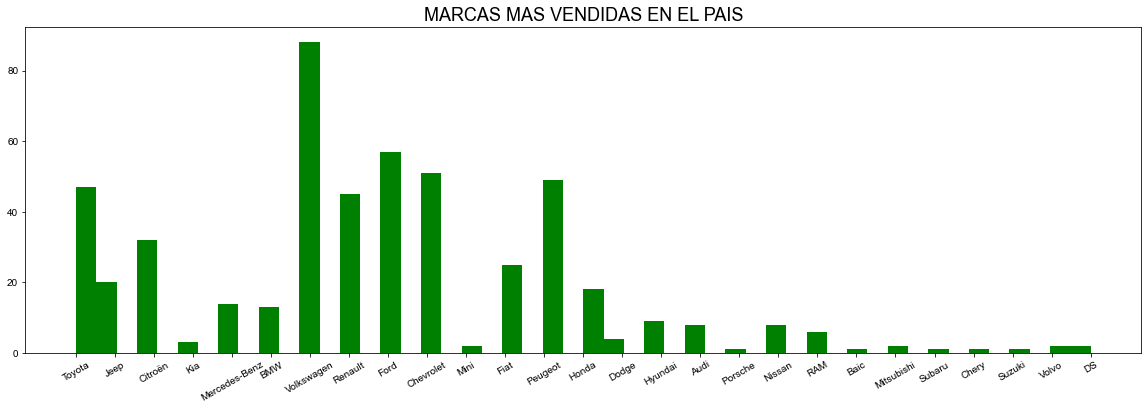

<Figure size 576x396 with 0 Axes>

In [12]:
df['Marca'].hist(bins=50, color='green') # Vemos graficamente su distribución
plt.title('MARCAS MAS VENDIDAS EN EL PAIS', fontsize=18)
plt.grid(False)

plt.gcf().set_size_inches(20, 6)  # Tamaño de la figura (ancho, alto)
plt.style.use('seaborn')  # Cambiar un estilo predefinido de fondo(como 'ggplot', 'seaborn', etc.)
plt.xticks(rotation=30) # Para rotar las etiquetas del eje X porque si no se superponen unas con otras.

plt.show()
plt.clf()




In [13]:
df.Combustible.value_counts()

Nafta            416
Diésel            72
Nafta/GNC         19
Híbrido/Nafta      3
Name: Combustible, dtype: int64

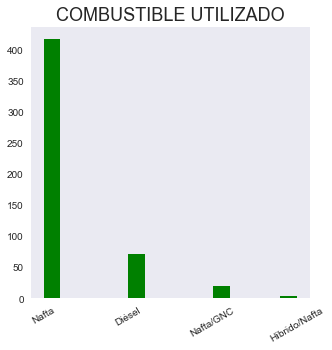

<Figure size 576x396 with 0 Axes>

In [14]:
df['Combustible'].hist(bins=15, color='green') # Vemos graficamente su distribución
plt.title('COMBUSTIBLE UTILIZADO', fontsize=18)
plt.grid(False)

plt.gcf().set_size_inches(5, 5)  # Tamaño de la figura (ancho, alto)
plt.style.use('seaborn')  # Cambiar un estilo predefinido de fondo(como 'ggplot', 'seaborn', etc.)
plt.xticks(rotation=30) # Para rotar las etiquetas del eje X porque si no se superponen unas con otras.

plt.show()
plt.clf()

In [15]:
df.Carroceria.value_counts()

Hatchback      184
SUV            130
Sedán           98
Pick-Up         55
Monovolumen     18
Coupé           11
Furgón           8
Rural            3
Minivan          1
Crossover        1
Sedan            1
Name: Carroceria, dtype: int64

In [16]:
# En este caso hay 3 tipos de carroceria que voy a eliminar y agregar en otras mas representativas.
df.Carroceria = df.Carroceria.replace(["Sedan"], "Sedán")
df.Carroceria = df.Carroceria.replace(["Minivan", "Crossover"], "SUV")

In [17]:
# Vuelvo para ver como quedan los valores de esa columna.
df.Carroceria.value_counts()

Hatchback      184
SUV            132
Sedán           99
Pick-Up         55
Monovolumen     18
Coupé           11
Furgón           8
Rural            3
Name: Carroceria, dtype: int64

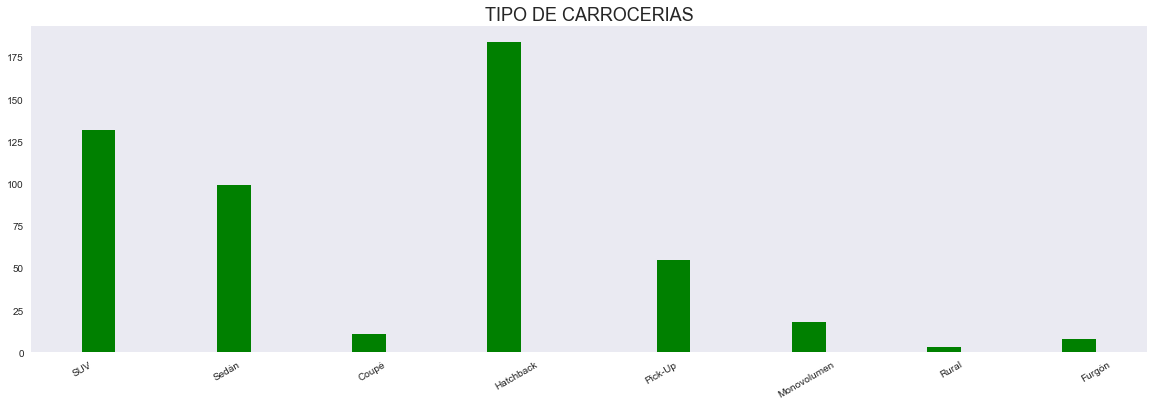

<Figure size 576x396 with 0 Axes>

In [18]:
df['Carroceria'].hist(bins=30, color='green') # Vemos graficamente su distribución
plt.title('TIPO DE CARROCERIAS', fontsize=18)
plt.grid(False)

plt.gcf().set_size_inches(20, 6)  # Tamaño de la figura (ancho, alto)
plt.style.use('seaborn')  # Cambiar un estilo predefinido de fondo(como 'ggplot', 'seaborn', etc.)
plt.xticks(rotation=30) # Para rotar las etiquetas del eje X porque si no se superponen unas con otras.

plt.show()
plt.clf()

In [19]:
df.Color.value_counts()

Gris           169
Blanco         150
Negro           60
Plateado        53
Azul            25
Rojo            24
Dorado           8
Marrón           4
Violeta          4
Celeste          4
Naranja          3
Gris oscuro      3
Verde            2
Beige            1
Name: Color, dtype: int64

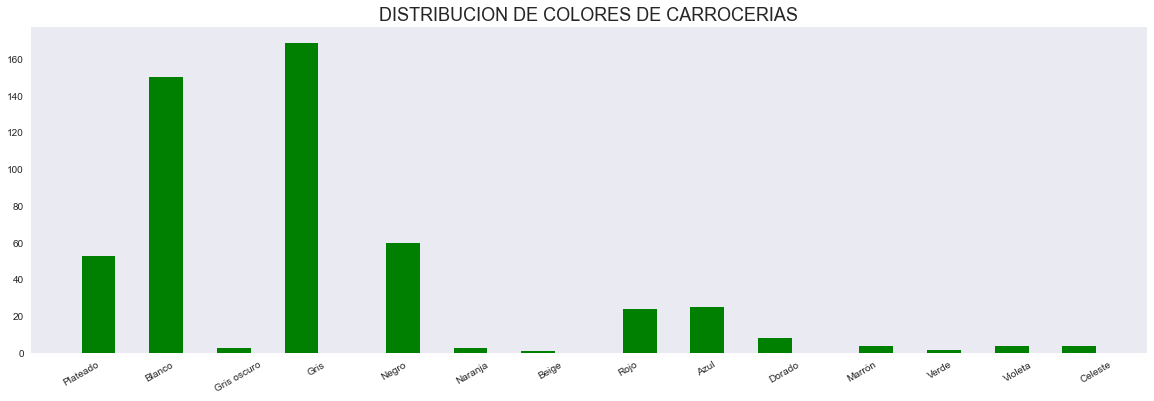

<Figure size 576x396 with 0 Axes>

In [20]:
df['Color'].hist(bins=30, color='green') # Vemos graficamente su distribución
plt.title('DISTRIBUCION DE COLORES DE CARROCERIAS', fontsize=18)
plt.grid(False)

plt.gcf().set_size_inches(20, 6)  # Tamaño de la figura (ancho, alto)
plt.style.use('seaborn')  # Cambiar un estilo predefinido de fondo(como 'ggplot', 'seaborn', etc.)
plt.xticks(rotation=30) # Para rotar las etiquetas del eje X porque si no se superponen unas con otras.

plt.show()
plt.clf()

---
**PROCESO**	
- [x] Cargar archivo, ver el contenido, preprocesarlo
- [x] Procesar y manipular los datos
- [x] Aplicar algoritmos para estudiar los datos
---

In [21]:
df.corr()

,Precio,Año,Puertas,Km
Precio,1.000000,0.428133,0.070264,-0.219567
Año,0.428133,1.000000,0.083977,-0.679453
Puertas,0.070264,0.083977,1.000000,-0.078398
Km,-0.219567,-0.679453,-0.078398,1.000000


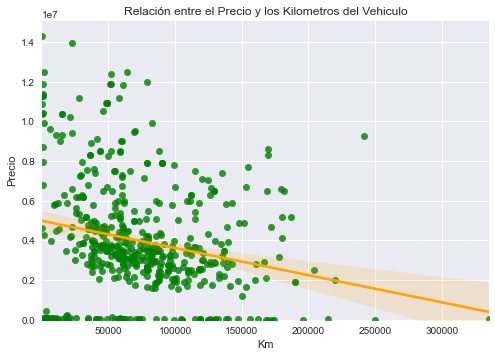

In [22]:
sns.regplot(x="Km", y="Precio", data=df, line_kws={"color": "orange"}, scatter_kws={"color": "green"})
plt.ylim(0,)
plt.title("Relación entre el Precio y los Kilometros del Vehiculo")
sns.set_style("whitegrid") # Fondo con cuadrícula

plt.savefig("argentina_cars.png")  #Aca guardo el grafico en una imagen para volver a usarlo sin modificaciones mas abajo
plt.show()

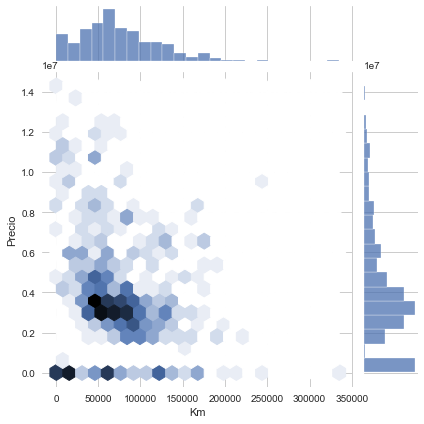

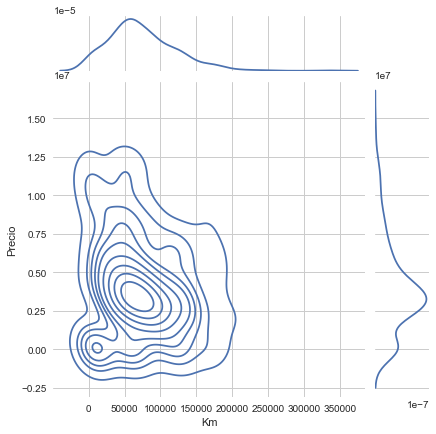

In [23]:
# Graficos para ver bien donde estan repetidos los valores, dos formas de verlos mejor
sns.jointplot(x="Km", y="Precio", data=df, kind="hex")
plt.show()

sns.jointplot(x="Km", y="Precio", data=df, kind="kde")
plt.show()


La relación entre Km y Precio es bastante obvia pero a titulo de demostración y practica, calculo una regresión lineal
teniendo en cuenta estos valores.

In [24]:
# Regresión lineal
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm

LinearRegression()

In [25]:
X = df[['Km']]
Y = df['Precio']

In [26]:
lm.fit(X,Y) # Entrenamos el modelo

LinearRegression()

In [27]:
Yhat=lm.predict(X)
Yhat[0:5] # Selecciona las primeras 5 predicciones de la matriz

array([4983153.12497787, 4983153.12497787, 4983153.12497787,
       4982468.10030982, 4866698.93140833])

In [28]:
print ('Intercepcion: ',lm.intercept_, 'o lo que es lo mismo, cuando X=0, Y tendra ese valor')
print ('Coeficiente: ', lm.coef_)

Intercepcion:  4990003.371658436 o lo que es lo mismo, cuando X=0, Y tendra ese valor
Coeficiente:  [-13.70049336]


In [29]:
# Sera una regresión lineal con la formula Y=a+bX, donde a=intercept y donde b=coef
# Que seria como decir
# Y = 4990003.37 - 13.9663xBeneficio/Acciones
# Con esta formula podremos predecir el precio.

In [30]:
# Pido predecir el modelo de regresión lineal (lm) previamente entrenado
Yhat=lm.predict(X)
lm.predict(X)


array([4983153.12497787, 4983153.12497787, 4983153.12497787,
       4982468.10030982, 4866698.93140833, 4846148.19136665,
       2852726.40732326, 2606117.52682305, 4085770.80982432,
       4510486.10401913, 4231078.24241239, 2769427.40768764,
       3467727.85381071, 3467727.85381071, 4513226.20269136,
       3606253.54218502, 3989867.35629646, 3852862.42268524,
       3633654.52890727, 2523914.56665631, 3893963.9027686 ,
       3551451.56874053, 3921364.88949085, 2660919.50026754,
       3291142.1948792 , 4154273.27662994, 4469384.62393577,
       2523914.56665631, 4236476.23679668, 3688456.50235176,
       2432121.26113679, 4702293.01107485, 3482949.10193492,
       4140572.78326882, 4058369.82310208, 3277441.70151807,
       4455684.13057464, 2976030.84757337, 4113171.79654657,
       3756958.96915738, 4674892.02435261, 3852862.42268524,
       3633654.52890727, 3962466.36957422, 4209075.25007443,
       3647355.02226839, 3825461.43596299, 4983016.12004426,
       4387181.66376903,

(0.0, 15072523.151929786)

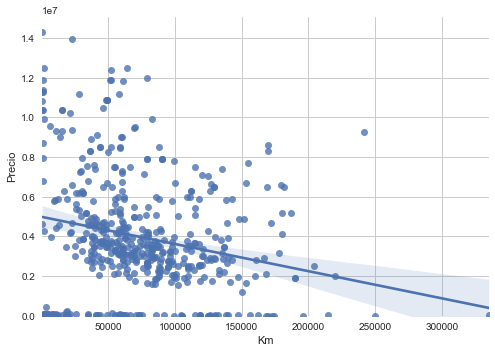

In [31]:
sns.regplot (x="Km", y="Precio", data=df)
plt.ylim (0, )

Procedo a evaluar la precisión del modelo comparando Yhat con los valores reales

## Mean Squared Error (MSE).

Busca la diferencia entre
el valor actual y la prediccion. Vamos a suponer a modo de ejemplo un caso donde el valor actual es 150 y el de la predicción es un valor de 50. Entonces tenemos la diferencia que es 150-50=100, a esa diferencia la elevamos al cuadrado (100)². Ahora de todos los errores asi calculados sacar la media o promedio dividiendo por la cantidad de muestra. El modelo con el menor MSE es el que mejor se ajusta a los datos.

In [32]:
from sklearn.metrics import mean_squared_error

In [33]:
mse = mean_squared_error(df['Precio'], Yhat)
print('El MSE (Error Cuadratico Medio) del precio y el valor que se predijo es: ', mse)

El MSE (Error Cuadratico Medio) del precio y el valor que se predijo es:  8090860395338.652


---
El valor obtenido, 8090860395338.652, es extremadamente alto. Indica que hay una gran discrepancia entre los valores reales dentro de (df['Precio']) y los valores predichos con el modelo ya entrenado (Yhat) 

---
**Interpretación del MSE:**

MSE alto

Indica que el modelo tiene un mal desempeño.

Los errores entre los valores reales y los predichos son muy grandes.

Esto puede deberse a:

- Un modelo que no se ajusta bien a los datos.

- Datos con mucha variabilidad o ruido.

- Variables independientes que no tienen una relación lineal con la variable dependiente.

MSE bajo

- Indica que el modelo tiene un buen desempeño.

- Los errores entre los valores reales y los predichos son pequeños.

---
Esto se debe en principio a que en los datos hay una columna que esta expresada en pesos y otra en dolares, asi que procedo
a modificar esta columna para expresar todo en una sola moneda, pasando a dolares todos los valores que no lo esten, utilizando
de modo arbitrario un tipo de cambio de $1200 por cada dolar, aproximadamente acorde a lo que en este momento cotiza en el pais.
---

In [34]:
# Como estan actualmente los datos
df.head(3)

,Precio,Marca,Modelo,Año,Color,Combustible,Puertas,Transmision,Motor,Carroceria,Km,Moneda
0,10350000,Toyota,Corolla Cross,2022,Plateado,Nafta,5.0,Automática,1.6,SUV,500,pesos
1,10850000,Jeep,Compass,2022,Blanco,Nafta,5.0,Automática,2.4,SUV,500,pesos
2,35500,Jeep,Compass,2022,Gris oscuro,Nafta,5.0,Automática,2.4,SUV,500,dólares


In [35]:
df.loc[df["Moneda"] == "pesos", "Precio"] = df["Precio"] / 1200 #Tomo solo los valores en pesos y los convierto a dolares
df.loc[df["Moneda"] == "pesos", "Moneda"] = "dólares" # Cambia el valor en la columna "Moneda" para reflejar que esta en dolares

In [36]:
# Ver el resultado, figura expresado en dolares pero con muchos decimales que dificulta ver y entender bien los valores
df.head(3) 


,Precio,Marca,Modelo,Año,Color,Combustible,Puertas,Transmision,Motor,Carroceria,Km,Moneda
0,8625.000000,Toyota,Corolla Cross,2022,Plateado,Nafta,5.0,Automática,1.6,SUV,500,dólares
1,9041.666667,Jeep,Compass,2022,Blanco,Nafta,5.0,Automática,2.4,SUV,500,dólares
2,35500.000000,Jeep,Compass,2022,Gris oscuro,Nafta,5.0,Automática,2.4,SUV,500,dólares


In [37]:
df["Precio"] = df["Precio"].round(0).astype(int) # Para eliminar los decimales

In [38]:
df.head(3)

,Precio,Marca,Modelo,Año,Color,Combustible,Puertas,Transmision,Motor,Carroceria,Km,Moneda
0,8625,Toyota,Corolla Cross,2022,Plateado,Nafta,5.0,Automática,1.6,SUV,500,dólares
1,9042,Jeep,Compass,2022,Blanco,Nafta,5.0,Automática,2.4,SUV,500,dólares
2,35500,Jeep,Compass,2022,Gris oscuro,Nafta,5.0,Automática,2.4,SUV,500,dólares


In [39]:
df.corr()

,Precio,Año,Puertas,Km
Precio,1.000000,0.145336,-0.290603,-0.224759
Año,0.145336,1.000000,0.083977,-0.679453
Puertas,-0.290603,0.083977,1.000000,-0.078398
Km,-0.224759,-0.679453,-0.078398,1.000000


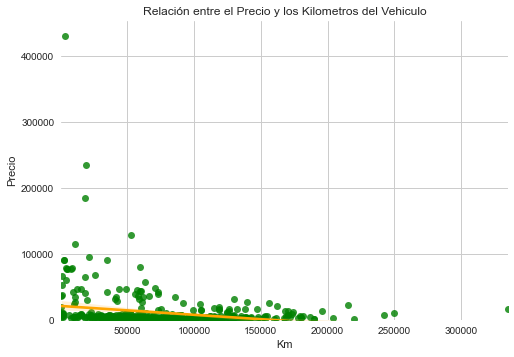

In [40]:
sns.regplot(x="Km", y="Precio", data=df, line_kws={"color": "orange"}, scatter_kws={"color": "green"})
plt.ylim(0,)
plt.title("Relación entre el Precio y los Kilometros del Vehiculo")
sns.set_style("whitegrid") # Fondo con cuadrícula

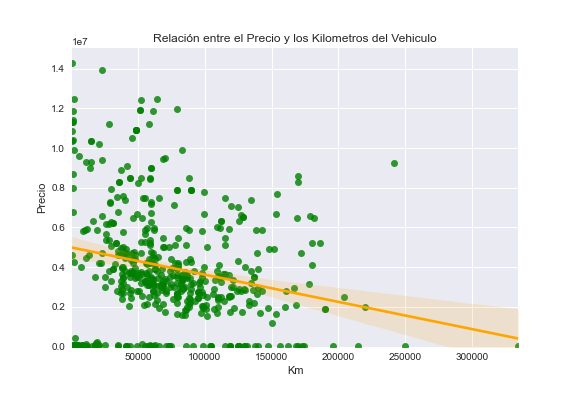

In [41]:
from IPython.display import display
from PIL import Image

# Cargar y mostrar la imagen guardada
img = Image.open("argentina_cars.png")
display(img)

Como se puede observar en los dos ultimos graficos, el primero es con los valores normalizados expresados todos en dolares
el ultimo grafico lo puse para comparar y ver la distribución de los datos cuando todavia no habia normalizado los mismos.

In [42]:
# Regresión lineal (vuelvo a calcular con datos corregidos)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm

LinearRegression()

In [43]:
X = df[['Km']]
Y = df['Precio']

In [44]:
lm.fit(X,Y) # Entrenamos el modelo

LinearRegression()

In [45]:
Yhat=lm.predict(X)
Yhat[0:5] # Selecciona las primeras 5 predicciones de la matriz

array([20945.24071138, 20945.24071138, 20945.24071138, 20938.53694   ,
       19805.59957523])

In [46]:
print ('Intercepcion: ',lm.intercept_, 'o lo que es lo mismo, cuando X=0, Y tendra ese valor')
print ('Coeficiente: ', lm.coef_)

Intercepcion:  21012.278425276272 o lo que es lo mismo, cuando X=0, Y tendra ese valor
Coeficiente:  [-0.13407543]


In [47]:
# Pido predecir el modelo de regresión lineal (lm) previamente entrenado
Yhat=lm.predict(X)
lm.predict(X)

array([ 20945.24071138,  20945.24071138,  20945.24071138,  20938.53694   ,
        19805.59957523,  19604.48643356,     96.5116912 ,  -2316.84600889,
        12163.30019163,  16319.63845289,  13585.30417869,   -718.66690972,
         6115.02356893,   6115.02356893,  16346.45353844,   7470.66021924,
        11224.77219715,   9884.01791932,   7738.8110748 ,  -3121.29857558,
        10286.24420267,   6934.35850811,  10554.39505824,  -1780.54429776,
         4386.92538024,  12833.67733054,  15917.41216954,  -3121.29857558,
        13638.12989724,   8275.11278593,  -4019.60394173,  18196.69444184,
         6263.9813692 ,  12699.60190276,  11895.14933606,   4252.84995246,
        15783.33674176,   1303.19054124,  12431.45104719,   8945.48992485,
        17928.54358628,   9884.01791932,   7738.8110748 ,  10956.62134159,
        13369.97904167,   7872.88650259,   9615.86706376,  20943.89995711,
        15112.95960284,  13906.2807528 ,  13008.24353751,  12940.66952191,
        19671.52414745,  

In [48]:
# Ahora evaluo los resultados
from sklearn.metrics import mean_squared_error

In [49]:
mse = mean_squared_error(df['Precio'], Yhat)
print('El MSE (Error Cuadratico Medio) del precio y el valor que se predijo es: ', mse)

El MSE (Error Cuadratico Medio) del precio y el valor que se predijo es:  737676895.8393358


Si bien bajo el error cuadratico medio, pese a la correccion sigue siendo un valor muy alto y el modelo tiene mal desempeño para
utilizarse en estos datos.

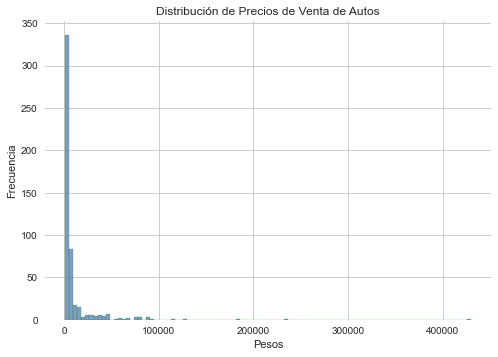

In [50]:
plt.hist(df['Precio'], bins=100, edgecolor='green', alpha=0.7)
plt.xlabel('Pesos')
plt.ylabel('Frecuencia')
plt.title('Distribución de Precios de Venta de Autos')
plt.show()

In [51]:
df.head(100)

,Precio,Marca,Modelo,Año,Color,Combustible,Puertas,Transmision,Motor,Carroceria,Km,Moneda
0,8625,Toyota,Corolla Cross,2022,Plateado,Nafta,5.0,Automática,1.6,SUV,500,dólares
1,9042,Jeep,Compass,2022,Blanco,Nafta,5.0,Automática,2.4,SUV,500,dólares
2,35500,Jeep,Compass,2022,Gris oscuro,Nafta,5.0,Automática,2.4,SUV,500,dólares
3,19000,Citroën,C4 Cactus,2022,Gris oscuro,Nafta,5.0,Automática,1.6,SUV,550,dólares
4,4833,Toyota,Corolla,2019,Gris,Nafta,4.0,Manual,1.8,Sedán,9000,dólares
...,...,...,...,...,...,...,...,...,...,...,...,...
95,4908,Toyota,Yaris,2021,Blanco,Nafta,5.0,Automática,1.5,Hatchback,19000,dólares
96,78500,RAM,1500,2022,Gris,Nafta,4.0,Automática,5.7,Pick-Up,8300,dólares
97,6292,Volkswagen,Nivus,2021,Blanco,Nafta,5.0,Automática,1.0,SUV,34000,dólares
98,2992,Renault,Sandero,2018,Gris,Nafta,5.0,Manual,1.6,Hatchback,57000,dólares


Como se puede observar en el ultimo grafico mostrado y en el dataframe arriba impreso, los precios de los autos con menor valor de venta son los que mas frecuentemente se negocian y que las ventas de autos mas caros son pocos en realidad y con precios muy altos.

Voy a intentar mejorar el modelo incluyendo una variable mas para ver si mejoran las mediciones y poder utilizarlo. En el caso de este set de datos, una variable que deberia estar muy correlacionada al precio serian el año de fabricacion.

In [52]:
X = df[['Km', "Año", "Puertas"]]
Y = df['Precio']

In [53]:
lm.fit(X,Y) # Entrenamos el modelo

LinearRegression()

In [54]:
Yhat=lm.predict(X)
Yhat[0:5] # Selecciona las primeras 5 predicciones de la matriz

array([16095.43635927, 16095.43635927, 16095.43635927, 16088.08804019,
       26123.82394548])

In [55]:
print ('Intercepcion: ',lm.intercept_, 'o lo que es lo mismo, cuando X=0, Y tendra ese valor')
print ('Coeficiente: ', lm.coef_)

Intercepcion:  12574.996292883647 o lo que es lo mismo, cuando X=0, Y tendra ese valor
Coeficiente:  [-1.46966382e-01  2.98863639e+01 -1.13672609e+04]


In [56]:
# Pido predecir el modelo de regresión lineal (lm) previamente entrenado
Yhat=lm.predict(X)
lm.predict(X)

array([ 1.60954364e+04,  1.60954364e+04,  1.60954364e+04,  1.60880880e+04,
        2.61238239e+04,  1.46257725e+04, -6.99692690e+03,  1.54562097e+03,
        4.03916029e+04,  1.09354371e+04,  7.87843198e+03, -7.92036886e+03,
       -1.60662082e+02, -1.60662082e+02,  1.09947167e+04,  1.23638259e+04,
        5.35071460e+03,  3.76150533e+03,  1.38015685e+03, -1.06137792e+04,
        4.29206356e+03,  4.68472201e+02,  4.58599633e+03,  2.40246377e+03,
       -2.32388905e+03,  7.11431118e+03,  1.03451061e+04,  1.21805154e+04,
        1.94231431e+04,  1.33053969e+04, -1.15386812e+04,  2.44498865e+04,
       -3.26132435e+02,  6.90757207e+03,  5.99588741e+03, -2.56051452e+03,
        1.03475716e+04,  5.69303146e+03,  6.58375294e+03,  1.41000016e+04,
        1.27588064e+04,  3.76150533e+03,  2.40250196e+04,  4.99700911e+03,
        1.89498922e+04,  1.52712324e+03,  3.40779983e+03,  1.60939667e+04,
        9.49319421e+03,  8.26015587e+03,  1.86430360e+04,  7.20170399e+03,
        2.59768576e+04,  

In [57]:
# Ahora evaluo los resultados
from sklearn.metrics import mean_squared_error

In [58]:
mse = mean_squared_error(df['Precio'], Yhat)
print('El MSE (Error Cuadratico Medio) del precio y el valor que se predijo es: ', mse)

El MSE (Error Cuadratico Medio) del precio y el valor que se predijo es:  663404475.7780166


Por lo que se ve, mejora pero no lo suficiente para utilizar este modelo de regresion. Asi que procedo a tratar los
    set de datos y ver que hacer con los outliers que podrian estar modificando el analisis.

---

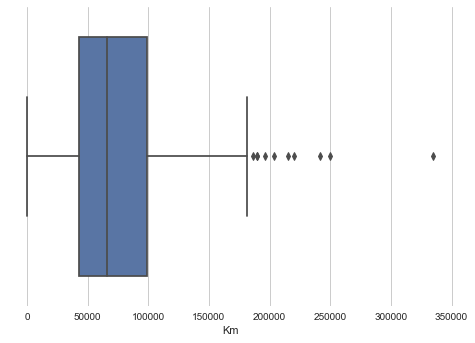

In [59]:
# Grafico para ver los outliers, son todos los puntos fuera del grafico (fuera del diagrama de caja)
sns.boxplot(x=df['Km'])
plt.show()

Aplico una tecnica conocida como "Winsorization" porque los outliers no los identifico como errores si no que mas bien son
valores extremos pero si los elimino afectaran al modelo. Entonces en la sentencia de abajo defino los valores minimos y maximos en donde pueden estar los datos (0 y 170.000 kilometros)

In [60]:
df['Km'] = df['Km'].clip(lower=0, upper=170000)

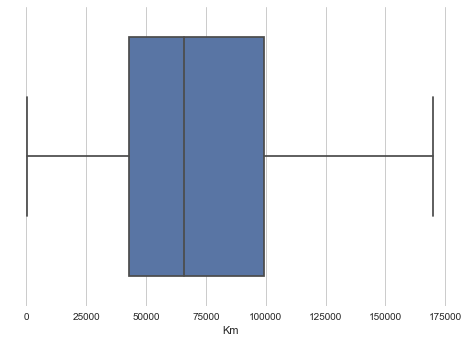

In [61]:
# Vuelvo a pasar la sentencia del grafico y se puede ver que ya no tiene outliers, pero a la vez no se borraron los datos.
sns.boxplot(x=df['Km'])
plt.show()

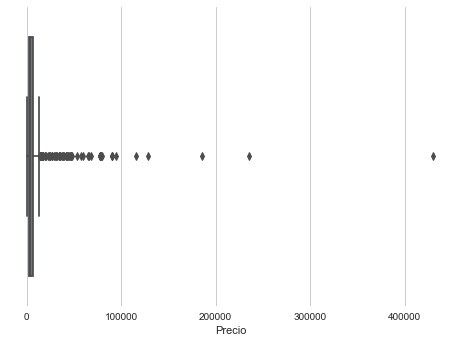

In [62]:
# Ahora con los valores de la columna "Precio". Aca tambien grafico para ver los outliers de la columna "Precios", estos son
# todos los puntos fuera del grafico (fuera del diagrama de caja).
sns.boxplot(x=df['Precio'])
plt.show()

In [63]:
df['Precio'] = df['Precio'].clip(lower=0, upper=180000)

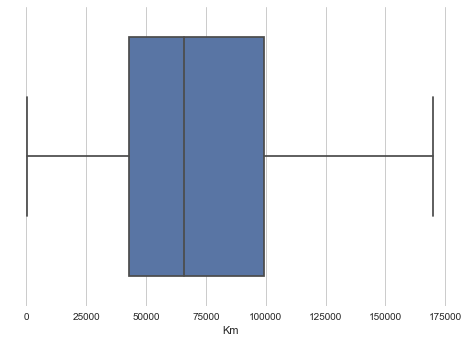

In [64]:
# Vuelvo a pasar la sentencia del grafico y se puede ver que ya no tiene outliers, pero a la vez no se borraron los datos.
sns.boxplot(x=df['Km'])
plt.show()

In [65]:
df.head(3)

,Precio,Marca,Modelo,Año,Color,Combustible,Puertas,Transmision,Motor,Carroceria,Km,Moneda
0,8625,Toyota,Corolla Cross,2022,Plateado,Nafta,5.0,Automática,1.6,SUV,500,dólares
1,9042,Jeep,Compass,2022,Blanco,Nafta,5.0,Automática,2.4,SUV,500,dólares
2,35500,Jeep,Compass,2022,Gris oscuro,Nafta,5.0,Automática,2.4,SUV,500,dólares


In [66]:
X = df[['Km', "Año", 'Puertas']]
Y = df['Precio']

In [67]:
lm.fit(X,Y) # Entrenamos el modelo

LinearRegression()

In [68]:
Yhat=lm.predict(X)
Yhat[0:5] # Selecciona las primeras 5 predicciones de la matriz

array([16346.14228293, 16346.14228293, 16346.14228293, 16339.27869204,
       23450.21624862])

In [69]:
print ('Intercepcion: ',lm.intercept_, 'o lo que es lo mismo, cuando X=0, Y tendra ese valor')
print ('Coeficiente: ', lm.coef_)

Intercepcion:  -76716.43045134417 o lo que es lo mismo, cuando X=0, Y tendra ese valor
Coeficiente:  [-1.37271818e-01  6.70082864e+01 -8.47190928e+03]


In [70]:
# Pido predecir el modelo de regresión lineal (lm) previamente entrenado
Yhat=lm.predict(X)
lm.predict(X)

array([ 1.63461423e+04,  1.63461423e+04,  1.63461423e+04,  1.63392787e+04,
        2.34502162e+04,  1.49734241e+04, -5.53569166e+03,  6.12362444e+02,
        3.23685163e+04,  1.14092397e+04,  8.47570169e+03, -6.43731260e+03,
        1.16236925e+03,  1.16236925e+03,  1.15037024e+04,  1.02851427e+04,
        6.19291064e+03,  4.55215932e+03,  2.28880195e+03, -7.65852197e+03,
        5.16499963e+03,  1.39816275e+03,  5.43954326e+03,  1.21543702e+03,
       -1.21000178e+03,  7.84017245e+03,  1.06623828e+04,  9.41931315e+03,
        1.72697292e+04,  1.12427902e+04, -7.52450540e+03,  2.20039793e+04,
        5.77787092e+02,  7.56888406e+03,  6.67824487e+03, -1.54829846e+03,
        1.08601524e+04,  4.17166397e+03,  7.22733214e+03,  1.20631659e+04,
        1.31905181e+04,  4.55215932e+03,  1.90315956e+04,  5.78435043e+03,
        1.65931359e+04,  2.42607376e+03,  4.14359911e+03,  1.63447696e+04,
        9.90576021e+03,  8.87133871e+03,  1.64238013e+04,  7.88270708e+03,
        2.33129444e+04,  

In [71]:
mse = mean_squared_error(df['Precio'], Yhat)
print('El MSE (Error Cuadratico Medio) del precio y el valor que se predijo es: ', mse)

El MSE (Error Cuadratico Medio) del precio y el valor que se predijo es:  367588770.76562


---
Por lo visto, corrigiendo los outliers mejora muchisimo el MSE pero no lo suficiente, asi que procedo a utilizar otro algoritmo
para seguir estudiando el caso.
---


In [72]:
df.head(3)

,Precio,Marca,Modelo,Año,Color,Combustible,Puertas,Transmision,Motor,Carroceria,Km,Moneda
0,8625,Toyota,Corolla Cross,2022,Plateado,Nafta,5.0,Automática,1.6,SUV,500,dólares
1,9042,Jeep,Compass,2022,Blanco,Nafta,5.0,Automática,2.4,SUV,500,dólares
2,35500,Jeep,Compass,2022,Gris oscuro,Nafta,5.0,Automática,2.4,SUV,500,dólares


In [73]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np

# Datos de ejemplo
X = df[['Km']]  # Variable independiente
y = df['Precio']    # Variable dependiente

# Convertir a polinomio de grado 2
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Crear modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_poly, y)

LinearRegression()

In [74]:
from sklearn.metrics import mean_squared_error

# Predicciones
y_pred = modelo.predict(X_poly)

# Calcular el MSE
mse = mean_squared_error(y, y_pred)
print("MSE:", mse)

MSE: 376884976.31882495


### POLINOMICA

Tambien entrega un MSE muy alto.

In [75]:
# Busco estandarizar el df haciendo el precio una porcion de 1000 para ver como se comporta el resultado del MSE.
df["Precio"]=df["Precio"]/1000

In [76]:
df.head(3)

,Precio,Marca,Modelo,Año,Color,Combustible,Puertas,Transmision,Motor,Carroceria,Km,Moneda
0,8.625,Toyota,Corolla Cross,2022,Plateado,Nafta,5.0,Automática,1.6,SUV,500,dólares
1,9.042,Jeep,Compass,2022,Blanco,Nafta,5.0,Automática,2.4,SUV,500,dólares
2,35.500,Jeep,Compass,2022,Gris oscuro,Nafta,5.0,Automática,2.4,SUV,500,dólares


In [77]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np

# Datos de ejemplo
X = df[['Km']]  # Variable independiente
y = df['Precio']    # Variable dependiente

# Convertir a polinomio de grado 2
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Crear modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_poly, y)

LinearRegression()

In [78]:
from sklearn.metrics import mean_squared_error

# Predicciones
y_pred = modelo.predict(X_poly)

# Calcular el MSE
mse = mean_squared_error(y, y_pred)
print("MSE:", mse)

MSE: 376.88497631882484


In [79]:
df.mean()

Precio        10.424347
Año         2016.296078
Puertas        4.474510
Km         73286.174510
dtype: float64

- MSE = 376.88 (Raiz cuadrada de MSE es 19.41 unidades) 
- Promedio = 10.42 (Precio)

Quiere decir que el modelo esta cometiendo un error promedio de 19.41 unidades, cuando el valor promedio real es solo 10.42 unidades. Significa en otras palabras que el modelo esta dando un error mas grande que usar el promedio directamente.
Procedo a utilizar otro algoritmo...